<a href="https://colab.research.google.com/github/Olanle/Project-002/blob/main/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"olawalesamuelolaitan","key":"f8fbbc5983095c6f2d153e8d914dc529"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 97% 1.00G/1.03G [00:05<00:00, 174MB/s]
100% 1.03G/1.03G [00:05<00:00, 193MB/s]


In [5]:
!unzip asl-alphabet.zip -d asl_alphabet_data

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  

In [6]:
# STEP 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [19]:
# STEP 2: Set Dataset Directory
data_dir = "asl_alphabet_data/asl_alphabet_train/asl_alphabet_train"
img_height, img_width = 64, 64  # Resize images for performance
batch_size = 32

# STEP 3: Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [20]:
# STEP 4: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [21]:
# STEP 5: Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# STEP 6: Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 70s 31ms/step - accuracy: 0.4231 - loss: 1.9153 - val_accuracy: 0.7218 - val_loss: 0.8798
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8869 - loss: 0.3297 - val_accuracy: 0.7771 - val_loss: 0.9173
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 64s 29ms/step - accuracy: 0.9412 - loss: 0.1713 - val_accuracy: 0.7671 - val_loss: 0.9611
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.9594 - loss: 0.1170 - val_accuracy: 0.7790 - val_loss: 1.1117
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 64s 29ms/step - accuracy: 0.9698 - loss: 0.0919 - val_accuracy: 0.8153 - val_loss: 0.9053
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 74s 34ms/step - accuracy: 0.9766 - loss: 0.0670 - val_accuracy: 0.7974 - val_loss: 1.1245
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.9810 - loss: 0.0592 - val_accuracy: 0.8061 - val_loss: 1.1769
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9805 -

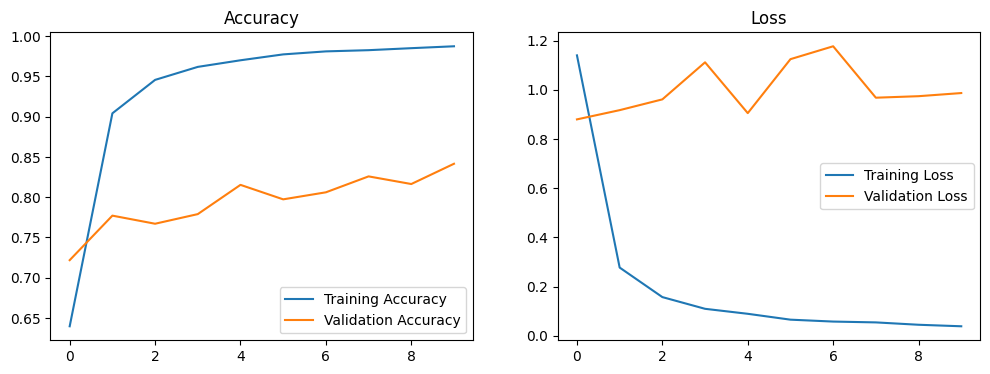

In [25]:
# STEP 7: Evaluate Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

Saving Q sign.png to Q sign.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


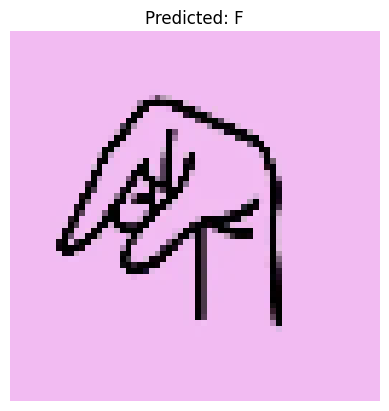

In [30]:
# STEP 9: Upload a Test Image
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
    # Load and preprocess image
    img_path = filename
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Show Image and Prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()
